In [13]:
from _settings import jupyer_notebook_print_many
jupyer_notebook_print_many()

In [1]:
import numpy as np
import os
import click
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch

from _visualizer import clear_jupyter_console, save_images
from _settings import set_dev_location, get_dataset_path, set_numpy_precision
import _telegramer as telegramer
from _utils_torch import *

from utils import get_config, adjust_scale_factor_by_image
from model import SinGAN

In [2]:
config = './config/random_sample.yaml'
location = 'macbook'

set_dev_location(location)
set_numpy_precision()

config = get_config(config)

try:
    path_img_load = os.path.join(get_dataset_path(), config['path_data'])
    input = plt.imread(path_img_load)[:, :, :3]
except FileNotFoundError:
    print("ERROR!! You should put input sample according to `get_dataset_path()`")
    sys.exit()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# model
model = SinGAN(input, config, device)

torch.Size([1, 3, 125, 187]) torch.Size([1, 3, 125, 187]) torch.Size([1, 3, 125, 187])


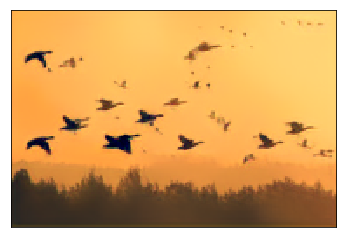

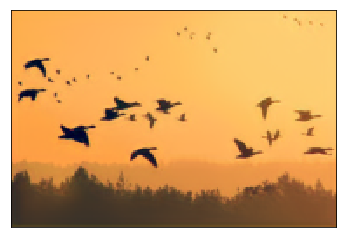

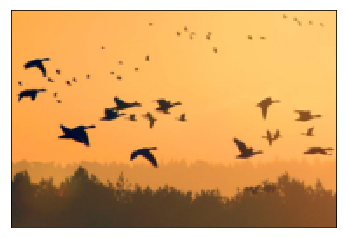

In [18]:
i = 6
fake = model.generate_fake_image(i).clamp(-1, 1)
recon = model.generate_recon_image(i).clamp(-1, 1)
real = model.real_pyramid[i]
print(fake.shape, recon.shape, real.shape)
show_torch(fake)
show_torch((recon))
show_torch(real)